<a href="https://colab.research.google.com/github/PetyoKaratov/Python---LSTM-for-Time-Series-Prediction/blob/main/Python_LSTM_for_Time_Series_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tools.eval_measures import rmse
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
xlsx = pd.ExcelFile('DataScientist.xlsx')
data_jobs = pd.read_excel(xlsx,  'Sheet1')
data_jobs['Date'] = pd.to_datetime(data_jobs['Date'], infer_datetime_format=True)

timeSeries = data_jobs.loc[:, ["Date","Jobs Active"]]
timeSeries.index = timeSeries.Date
df = timeSeries.drop("Date",axis=1)
df.columns = ['jobs_active']

In [ ]:
df.head()

,jobs_active
Date,
2019-07-26,174
2019-07-29,177
2019-07-30,178
2019-07-31,182
2019-08-01,184


In [ ]:
train, test = df[:-14], df[-14:]
scaler = MinMaxScaler()
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

In [ ]:
n_input = 14
n_features = 1

generator = TimeseriesGenerator(train, train, length=n_input, batch_size=6)

In [ ]:
model = Sequential()
model.add(LSTM(200, activation='relu', input_shape=(n_input, n_features)))
model.add(Dropout(0.15))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.fit_generator(generator, epochs=80)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/280
34/34 [==============================] - 1s 17ms/step - loss: 0.0744
Epoch 2/280
34/34 [==============================] - 1s 16ms/step - loss: 0.0052
Epoch 3/280
34/34 [==============================] - 1s 17ms/step - loss: 0.0035
Epoch 4/280
34/34 [==============================] - 1s 16ms/step - loss: 0.0042
Epoch 5/280
34/34 [==============================] - 1s 17ms/step - loss: 0.0037
Epoch 6/280
34/34 [==============================] - 1s 17ms/step - loss: 0.0022
Epoch 7/280
34/34 [==============================] - 1s 18ms/step - loss: 0.0051
Epoch 8/280
34/34 [==============================] - 1s 18ms/step - loss: 0.0018
Epoch 9/280
34/34 [==============================] - 1s 17ms/step - loss: 0.0043
Epoch 10/280
34/34 [==============================] - 1s 18ms/step - loss: 0.0018
Epoch 11/280
34/34 [==============================] - 1s 18ms/step - loss: 0.0018
Epoch 12/280
34/34 [===========

In [ ]:
pred_list = []

batch = train[-n_input:].reshape((1, n_input, n_features))

for i in range(n_input):
    pred_list.append(model.predict(batch)[0])
    batch = np.append(batch[:, 1:, :], [[pred_list[i]]], axis=1)

In [ ]:
df_predict = pd.DataFrame(scaler.inverse_transform(pred_list), index=df[-n_input:].index, columns=['Predictions'])

df_test = pd.concat([df, df_predict], axis=1)

In [ ]:
df_test.tail(14)

,jobs_active,Predictions
Date,,
2020-03-26,2504,2493.712073
2020-03-27,2428,2453.045865
2020-03-28,2432,2411.274816
2020-03-30,2383,2369.357453
2020-03-31,2306,2328.222978
2020-04-01,2248,2288.319258
2020-04-02,2240,2249.898117
2020-04-03,2215,2213.141569
2020-04-05,2219,2177.892624


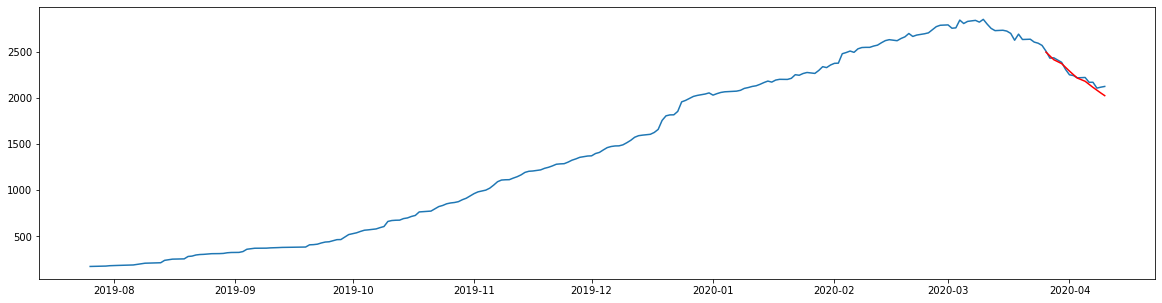

In [ ]:
plt.figure(figsize=(20, 5))
plt.plot(df_test.index, df_test['jobs_active'])
plt.plot(df_test.index, df_test['Predictions'], color='r')
plt.show()

In [ ]:
train = df

scaler.fit(train)
train = scaler.transform(train)
n_input = 28
n_features = 1

generator = TimeseriesGenerator(train, train, length=n_input, batch_size=6)

model.fit_generator(generator, epochs=80)

Epoch 1/180
34/34 [==============================] - 1s 33ms/step - loss: 9.8937e-04
Epoch 2/180
34/34 [==============================] - 1s 32ms/step - loss: 7.2699e-04
Epoch 3/180
34/34 [==============================] - 1s 32ms/step - loss: 9.9112e-04
Epoch 4/180
34/34 [==============================] - 1s 32ms/step - loss: 0.0010
Epoch 5/180
34/34 [==============================] - 1s 32ms/step - loss: 8.2740e-04
Epoch 6/180
34/34 [==============================] - 1s 32ms/step - loss: 7.7687e-04
Epoch 7/180
34/34 [==============================] - 1s 33ms/step - loss: 8.7929e-04
Epoch 8/180
34/34 [==============================] - 1s 32ms/step - loss: 7.1157e-04
Epoch 9/180
34/34 [==============================] - 1s 32ms/step - loss: 8.2086e-04
Epoch 10/180
34/34 [==============================] - 1s 31ms/step - loss: 7.5690e-04
Epoch 11/180
34/34 [==============================] - 1s 32ms/step - loss: 8.7446e-04
Epoch 12/180
34/34 [==============================] - 1s 32ms/step 

In [ ]:
pred_list = []

batch = train[-n_input:].reshape((1, n_input, n_features))

for i in range(n_input):
    pred_list.append(model.predict(batch)[0])
    batch = np.append(batch[:, 1:, :], [[pred_list[i]]], axis=1)

In [ ]:
from pandas.tseries.offsets import DateOffset
add_dates = [df.index[-1] + DateOffset(days=x) for x in range(0, 29)]
future_dates = pd.DataFrame(index=add_dates[1:], columns=df.columns)

In [ ]:
future_dates.tail(28)

,jobs_active
2020-04-11,NaN
2020-04-12,NaN
2020-04-13,NaN
2020-04-14,NaN
2020-04-15,NaN
2020-04-16,NaN
2020-04-17,NaN
2020-04-18,NaN
2020-04-19,NaN
2020-04-20,NaN


In [ ]:
df_predict = pd.DataFrame(scaler.inverse_transform(pred_list),
                          index=future_dates[-n_input:].index, columns=['Prediction']
                          )

df_proj = pd.concat([df, df_predict], axis=1)

In [ ]:
df_proj.tail(28)

,jobs_active,Prediction
2020-04-11,NaN,2073.762887
2020-04-12,NaN,2052.288124
2020-04-13,NaN,2028.433775
2020-04-14,NaN,2002.434294
2020-04-15,NaN,1974.808947
2020-04-16,NaN,1945.934678
2020-04-17,NaN,1916.095026
2020-04-18,NaN,1885.694984
2020-04-19,NaN,1855.224655
2020-04-20,NaN,1825.102258


No handles with labels found to put in legend.


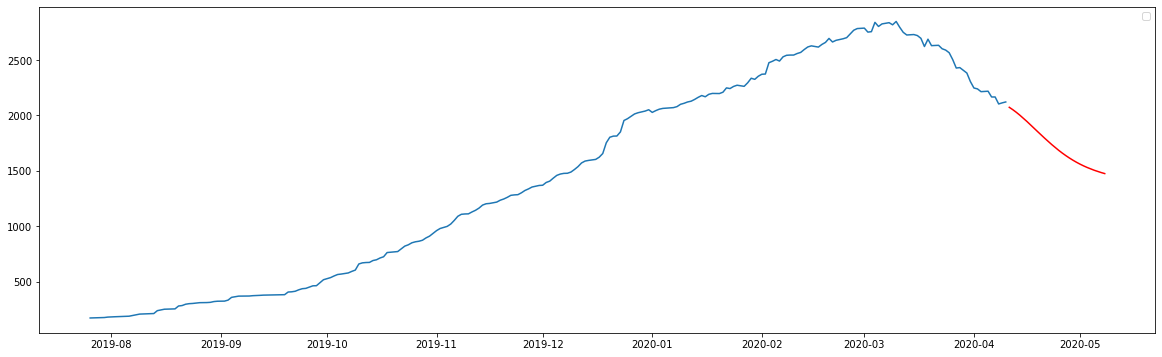

In [ ]:
plt.figure(figsize=(20, 6))
plt.plot(df_proj.index, df_proj['jobs_active'])
plt.plot(df_proj.index, df_proj['Prediction'], color='r')
plt.legend(loc='best')

plt.show()